# **Import Relevant libraries :**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sns.set()
from sklearn import preprocessing

# **Load the data :**

In [2]:
data = pd.read_csv('../input/market-segmentaion/3.12.Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


# **Plotting the data :**

Text(0, 0.5, 'loyalty')

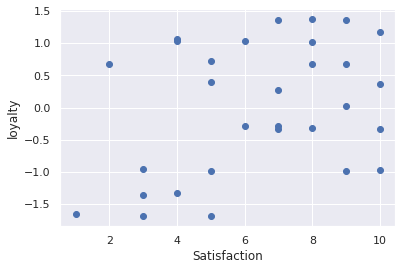

In [3]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('loyalty')

In [4]:
x = data.copy()

# **Clustering :**

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

# **Clustering Summary :**

Text(0, 0.5, 'Loyalty')

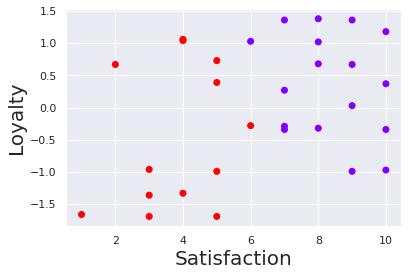

In [6]:
cluster = x.copy()
cluster['cluster_pred'] = kmeans.fit_predict(x)

plt.scatter(data['Satisfaction'],data['Loyalty'],c =  cluster['cluster_pred'] , cmap = 'rainbow')
plt.xlabel('Satisfaction',fontsize = 20)
plt.ylabel('Loyalty', fontsize = 20)

# **Standardizing the varable :**

In [7]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# **Calculating the number of clusters by Elbow Method :**

In [8]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[59.99999999999999,
 29.818973034723143,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.571285077136386,
 5.464232350204885,
 4.577850786434791,
 3.728283444358953]

Text(0, 0.5, 'WCSS')

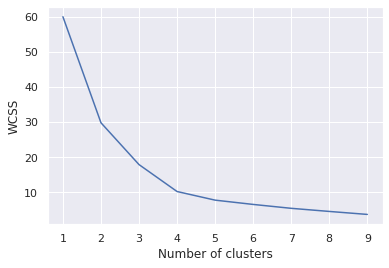

In [9]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

# **Selecting the Number of clusters :**

In [10]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)


Text(0, 0.5, 'Loyalty')

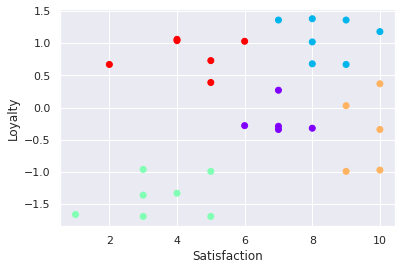

In [11]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c = cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# **Creating the dendrogram and heatmap :**

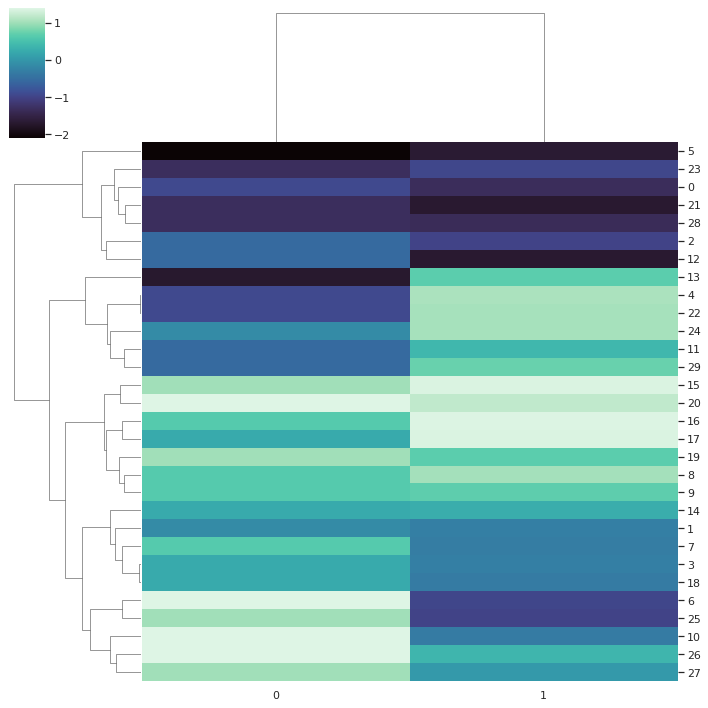

In [12]:
sns.clustermap(x_scaled,cmap = 'mako')